In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__)

4.8.1


In [3]:
#defining a function to stack images
def stackImages(scale,imgArray):
    # Get the number of rows and columns in the image array
    rows = len(imgArray)
    cols = len(imgArray[0])
    # Check if the images are organized as rows (lists of lists)
    rowsAvailable = isinstance(imgArray[0], list)

    # Get the dimensions of each individual image
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]

    # If images are organized in rows (lists of lists)
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                # Resize each image to have the same dimensions if needed
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)

                # Convert grayscale images to BGR format   
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        
        # Create a blank image to use as a placeholder
        imageBlank = np.zeros((height, width, 3), np.uint8)

        # Create lists to hold horizontally and vertically stacked images
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows

        # Horizontally stack each row of images
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])

        # Vertically stack the rows of horizontally stacked images
        ver = np.vstack(hor)

    # If images are organized in a single list    
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

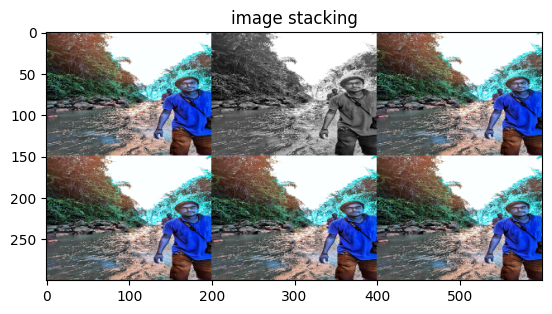

In [7]:
img=cv2.imread('images/mp7.jpg')
img=cv2.resize(img,(400,300))
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

imgStack = stackImages(0.5,([img,img_gray,img],[img,img,img]))

cv2.imshow("Image stack",imgStack)
cv2.waitKey(0)
cv2.destroyAllWindows()

## plotting the images
plt.imshow(imgStack)
plt.title("image stacking")
plt.show()